# Synthetic Data - Basic Example with CTGAN
<a class="anchor" id="top"></a>

Necessary imports:
* [CTGAN Repository](https://github.com/sdv-dev/CTGAN)
* [Table Evaluator Repository](https://github.com/Baukebrenninkmeijer/table-evaluator)


30March2022 - For now,  seaborn==0.11.1 works best with table evaluator has it doesn't produce annoying errors. Check if that's the version you have installed, if not, install it with **python -mpip install seaborn==0.11.1**

## Table of Contents
* [Top of Notebook](#top)
* [Section 1 - Imports](#imports)
* [Section 2 - Get Data](#getdata)
* [Section 3 - Prepare Data](#preparedata)
* [Section 4 - CTGAN](#ctgan)
* [Section 5 - Inspect and Validate](#inspect)

## Section 1 - Imports <a class="anchor" id="imports"></a>
[Back to Top](#top)

In [1]:
#basic data wrangling
import pandas as pd

#synthetic data generator
from ctgan import CTGANSynthesizer

#evaluator tool
from table_evaluator import load_data, TableEvaluator


#to get the iris dataset
from sklearn.datasets import load_boston


## Section 2 - Get Data <a class="anchor" id="getdata"></a>
[Back to Top](#top)

In [2]:
boston_dataset = load_boston()


## Section 3 - Prepare Data <a class="anchor" id="preparedata"></a>
[Back to Top](#top)

In [3]:
boston = pd.DataFrame(boston_dataset.data, columns=boston_dataset.feature_names)
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [4]:
# add target 
boston['MEDV'] = boston_dataset.target


## Section 4 - CTGAN <a class="anchor" id="ctgan"></a>
[Back to Top](#top)

In [5]:
list(boston.columns)

['CRIM',
 'ZN',
 'INDUS',
 'CHAS',
 'NOX',
 'RM',
 'AGE',
 'DIS',
 'RAD',
 'TAX',
 'PTRATIO',
 'B',
 'LSTAT',
 'MEDV']

In [6]:
# Names of the columns that are discrete
discrete_columns =['CRIM',
 'ZN',
 'INDUS',
 'CHAS',
 'NOX',
 'RM',
 'AGE',
 'DIS',
 'RAD',
 'TAX',
 'PTRATIO',
 'B',
 'LSTAT',
 'MEDV']



In [13]:
ctgan = CTGANSynthesizer(epochs=1000)
ctgan.fit(boston, discrete_columns)



C:\Users\susan\anaconda3\lib\site-packages\pandas\core\frame.py:3678: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  self[col] = igetitem(value, i)


In [14]:
# Synthetic copy
samples = ctgan.sample(1000)

In [15]:
samples

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.0453,25.0000,2.3100,0.0000,0.4990,7.8310,97.9000,5.8700,3.0000,296.0000,14.7000,48.4500,9.4200,17.4000
1,0.0659,0.0000,19.5800,0.0000,0.4720,5.4540,98.2000,1.5296,3.0000,437.0000,14.7000,396.9000,10.1300,12.0000
2,1.3880,0.0000,25.6500,0.0000,0.5970,6.4950,54.2000,3.4952,4.0000,307.0000,18.4000,396.9000,5.0300,12.8000
3,6.7177,22.0000,10.5900,0.0000,0.5380,7.1850,51.8000,6.2267,5.0000,296.0000,20.2000,389.4000,13.2700,21.4000
4,0.0925,0.0000,19.5800,0.0000,0.4370,6.0040,18.4000,3.5549,4.0000,307.0000,20.9000,396.9000,5.1900,21.7000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.0401,0.0000,3.3300,0.0000,0.5840,6.0950,70.6000,4.5667,24.0000,666.0000,18.4000,396.9000,17.1100,36.5000
996,0.1175,80.0000,2.9500,0.0000,0.4450,5.9130,81.8000,2.8340,2.0000,370.0000,20.9000,385.0200,9.0400,32.2000
997,0.1700,0.0000,6.2000,0.0000,0.6930,6.2510,94.9000,6.2700,4.0000,666.0000,17.0000,396.9000,4.6900,17.8000
998,0.0358,0.0000,6.0700,1.0000,0.6930,6.2190,95.3000,4.0900,24.0000,384.0000,18.3000,395.2100,16.5100,20.3000


In [10]:
samples=samples.drop_duplicates()

## Section 4 - Inspect and Validate <a class="anchor" id="inspect"></a>
[Back to Top](#top)

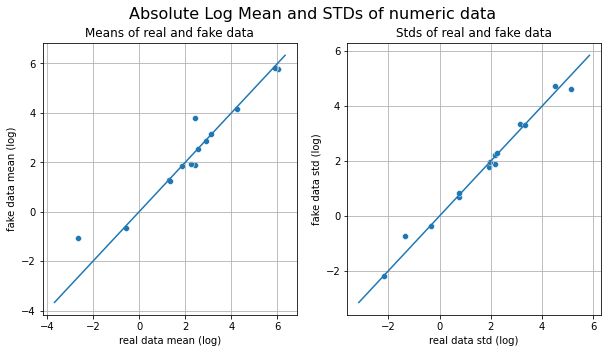

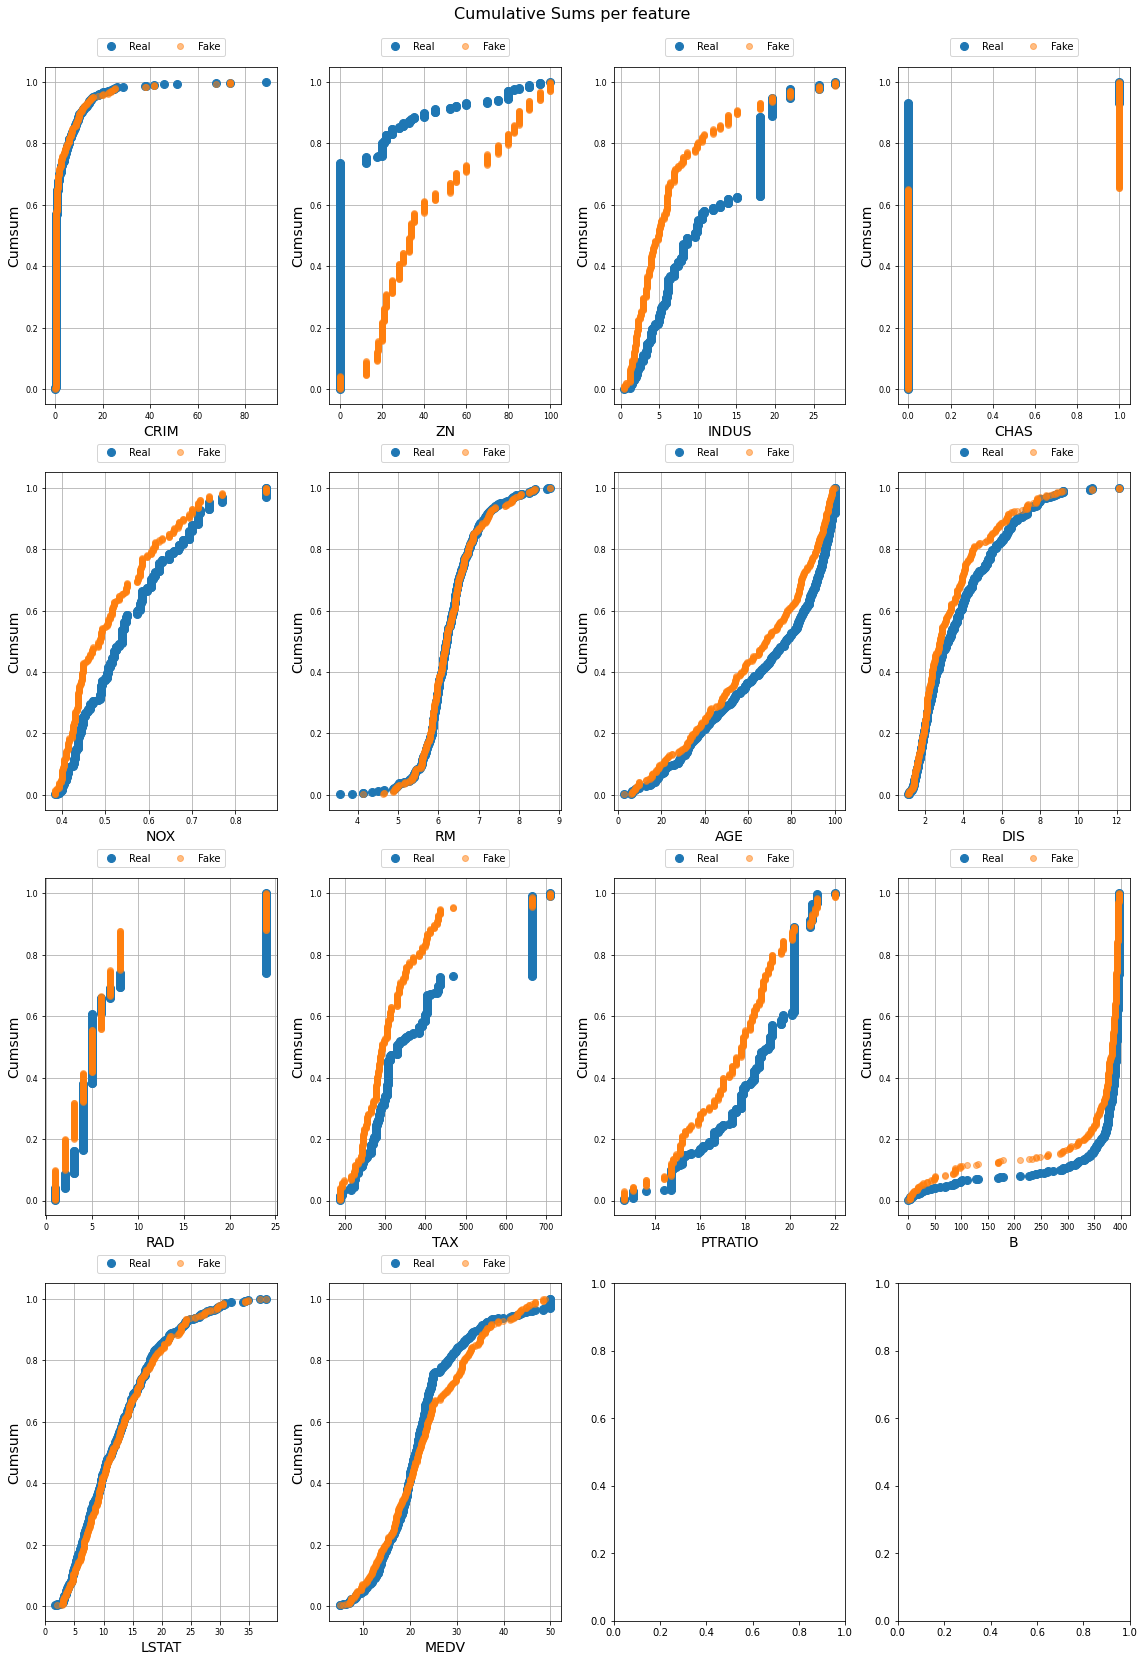

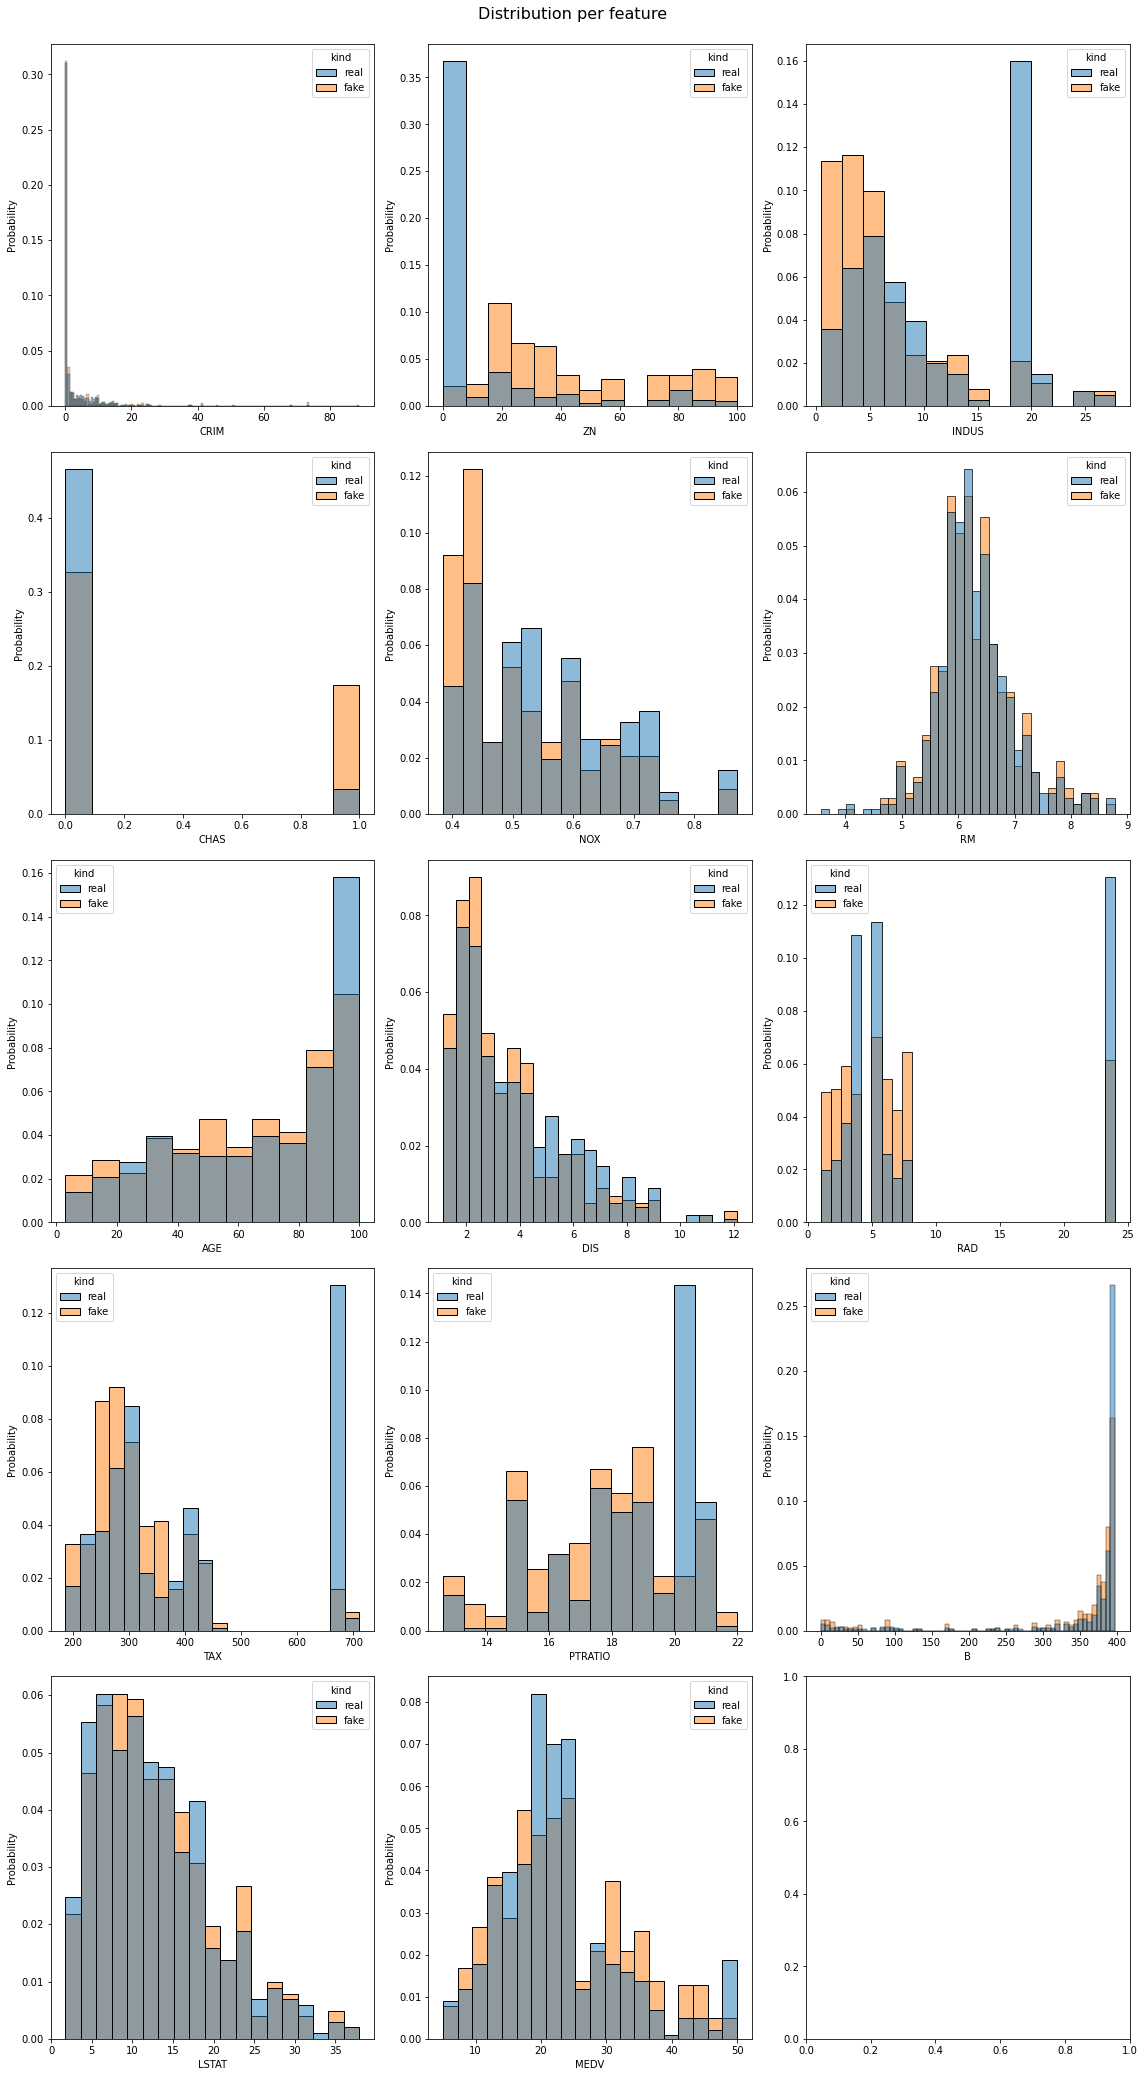

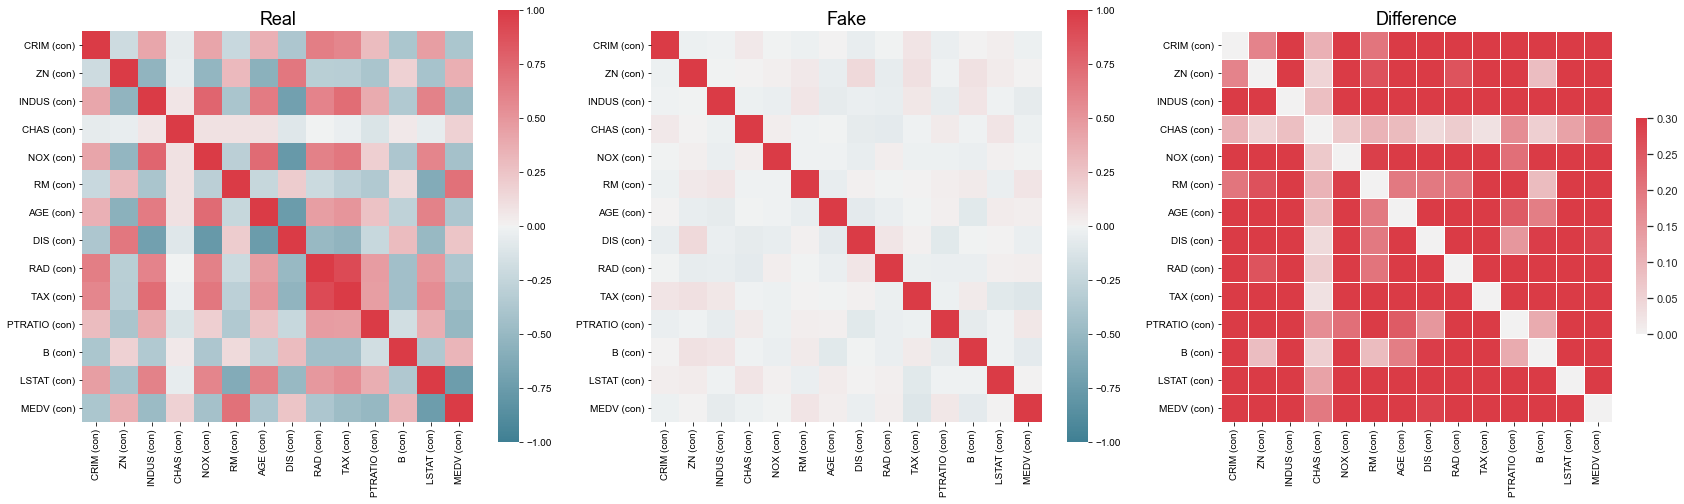

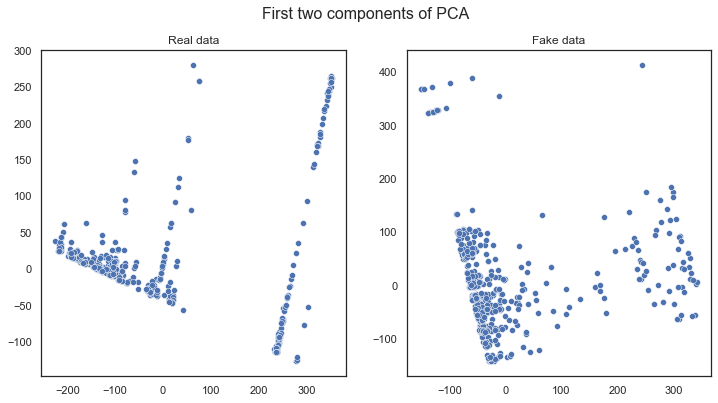

In [11]:
from table_evaluator import load_data, TableEvaluator
table_evaluator = TableEvaluator(boston, samples)
table_evaluator.visual_evaluation()